### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Importing library

In [5]:
library(ggplot2)

### Check for missing values

In [6]:
city = c('Chicago', 'New York', 'Washington')
c=0
for(i in list(chi, ny, wash)){
    c = c+1
    print(city[c])
    na_count <- colSums(is.na(i))
    print(na_count)
}

[1] "Chicago"
            X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             0             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          1747 
[1] "New York"
            X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type        Gender    Birth.Year 
            0             0             0          5218 
[1] "Washington"
            X    Start.Time      End.Time Trip.Duration Start.Station 
            0             0             0             1             0 
  End.Station     User.Type 
            0             0 


### Data cleaning and preprocessing

In [7]:
# Creating null columns of 'Gender' and 'Birth.Year' in the Washington dataset to be able to concatenate all
wash$Gender <- NA
wash$Birth.Year <-NA

In [8]:
# Add a new 'City' column to each dataset to capture information about the city
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [10]:
# Concatenating all three datasets together as "Data"
concatenation <- function(d1, d2) {
  return(rbind(d1, d2))
}
Data <- concatenation(ny,wash)     
Data <- concatenation(Data,chi)   
head(Data)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


### Question 1 
### Trip duration
**What is the average travel time for users in different cities?**

In [11]:
# Count number of users per city
Count_user = sort(table(Data$City))
print(Count_user)

# percentage of users in City
round((Count_user / sum(Count_user) * 100), digits = 2)


      Chicago New York City    Washington 
         8630         54770         89051 



      Chicago New York City    Washington 
         5.66         35.93         58.41 

In [12]:
#The average travel time for users in different cities
summary <- with(Data, aggregate(list(Trip.Duration/60), by = list(City), 
                   FUN = function(x) { meanDuration = mean(x, na.rm = TRUE) } ))

colnames(summary) <- c('City', 'Average.Trip.Duration')
summary

City,Average.Trip.Duration
Chicago,15.61955
New York City,15.06024
Washington,20.56589


Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”No summary function supplied, defaulting to `mean_se()


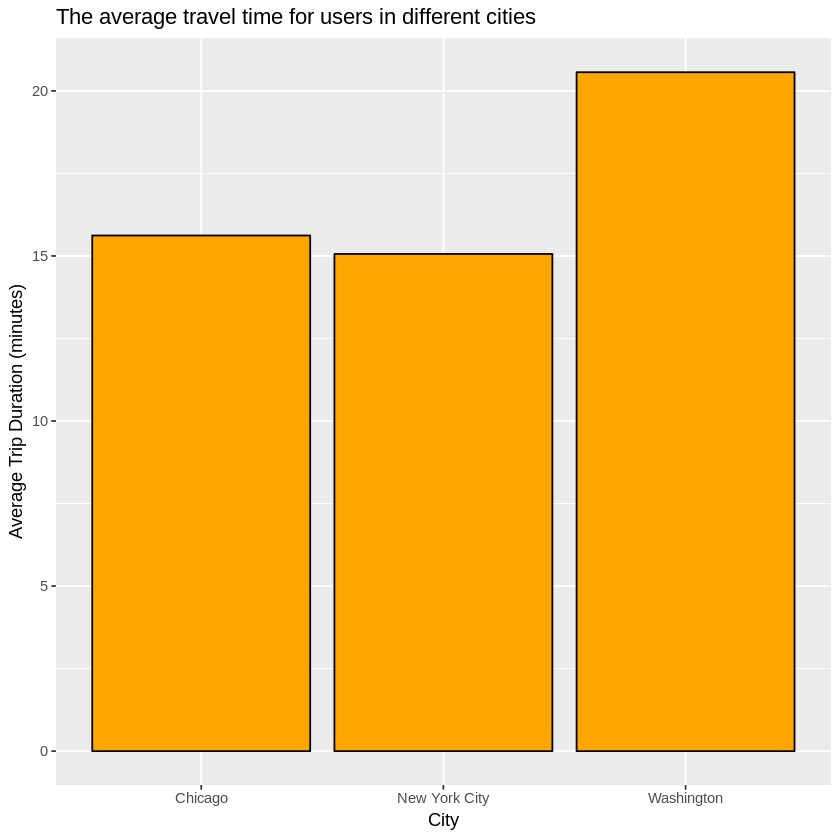

In [14]:
# Visualizing data with ggplot
ggplot(aes(x = City, y = Trip.Duration/60), data = Data) +
    geom_bar( stat = "summary",fill = "orange", colour="black") + 
    ggtitle('The average travel time for users in different cities') +
    labs(y = 'Average Trip Duration (minutes)', x = 'City')

**Summary of question 1 results.**

-Based on the results of the percentage of users in each city, the percentage of users in Washington is the highest at 58.41%, followed by New York City at 35.93% and finally the lowest is Chicago city. with 5.6%

-Looking at the chart Washington's average travel time is the highest at 20.5 minutes leading them in average trip length and having the most users, average travel time of the 2 cities Chicago and New York there is not much difference between Chicago at 15.6 minutes and New York City at 15 minutes.

-Although Chicago's number of users is much lower, the average travel time is a bit higher than New York city.


### Question 2
### Popular times of travel  
**What is the most common day of week?**

In [15]:
# Functions to extract days of week Start.Time of each table
weekday = function(df){
    return(factor(weekdays(as.Date(df$Start.Time)), 
                 levels = c('Monday', 'Tuesday', 'Wednesday',
                            'Thursday', 'Friday', 'Saturday', 'Sunday')))
}

count_table = function(var, var.Name, City.Name){
    var_count = data.frame(table(var))
    names(var_count) = c(var.Name, City.Name)
    var_count = subset(var_count, subset = var_count[1] != '')
    return(var_count)
}

weekday_table = cbind(count_table(weekday(chi), 'Weekday', 'Chicago'), 
                      'New.York'=count_table(weekday(ny), 'Weekday', 'New.York')[,2], 
                      'Washington'=count_table(weekday(wash), 'Weekday', 'Washington')[,2])
weekday_table


Weekday,Chicago,New.York,Washington
Monday,1302,7570,11721
Tuesday,1292,7898,13288
Wednesday,1236,9632,14212
Thursday,1254,8729,13204
Friday,1285,8168,12926
Saturday,1150,6176,12133
Sunday,1111,6597,11566


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

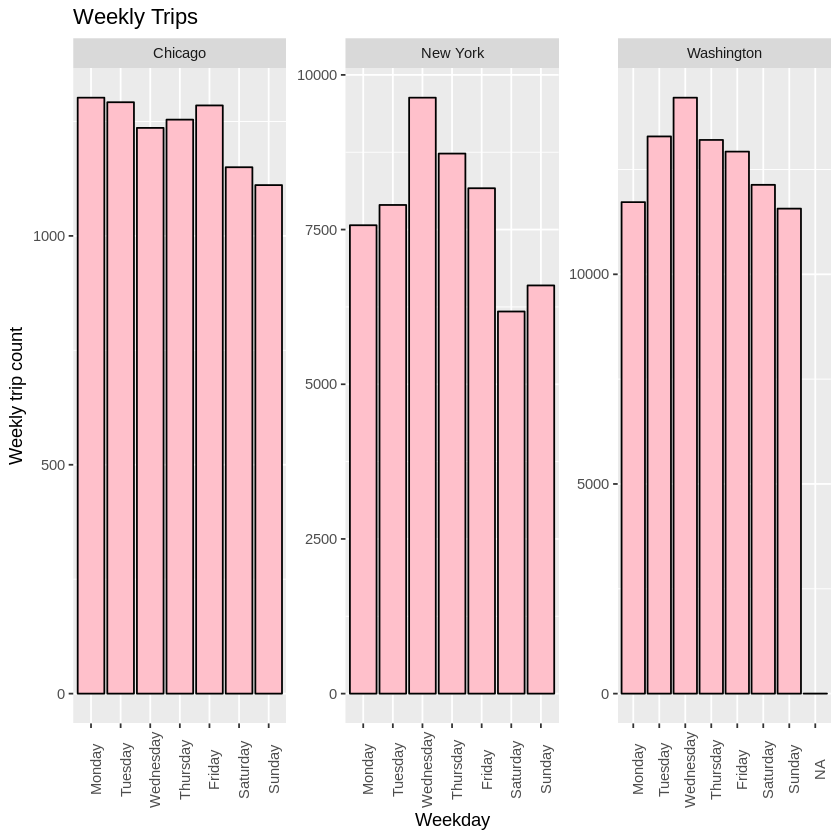

In [20]:
# Visualizing data with ggplot
two_col_df = function(Column, Col.Name,  City.Name){
    new_df = data.frame(Column, City.Name, stringsAsFactors = FALSE)
    names(new_df) = c(Col.Name, 'City')
    return(new_df)
}

weekday_df = rbind(two_col_df(weekday(chi), 'Weekday', 'Chicago'),
              two_col_df(weekday(ny), 'Weekday', 'New York'), 
              two_col_df(weekday(wash), 'Weekday', 'Washington'))


ggplot(data = weekday_df, aes(x = Weekday)) +
    geom_histogram(stat="count", color='black', fill='pink') +
    facet_wrap(~City, scales = "free") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Weekly Trips') +
    ylab('Weekly trip count')

**Summary of question 2 results.**

-Looking at the results of the returned data and the chart, we can analyze that in Chicago, the number of people using the service to travel is high on Mondays and Tuesdays, the lowest is on Sundays, in New York it is on Wednesdays. and Wednesday is the highest and Saturday is the lowest. In Washington, the same is true, the amount of usage is also high on Wednesday and the lowest is Sunday.

-It can be concluded from the analysis that users often use the service to travel quite a lot at the beginning of the week, it can be guessed that they use the service more to go to work than to use it for entertainment on the weekend.

### Question 3
### User info
**What are the counts of each gender (only available for NYC and Chicago)?**

In [22]:
# Creating new DataQ2 by binding 'New York City' and 'Chicago' data
DataQ3 <- concatenation(chi,ny)

In [23]:
# Count of Gender (Male and Female)
total = sort(table(DataQ3$Gender))
print(total)
# percentage of Gender (Male and Female)
round((total / length(DataQ3$Gender) * 100), digits = 2)


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

In [24]:
# Count of Gender(Male and Female) in Chicago
total_chi = sort(table(DataQ2$Gender[DataQ3$City == 'Chicago']))
print("Chicago:")
print(total_chi)
# Count of Gender(Male and Female) in New York City
total_ny = sort(table(DataQ2$Gender[DataQ3$City == 'New York City']))
print("New York:")
print(total_ny)

[1] "Chicago:"

Female          Male 
  1723   1748   5159 
[1] "New York:"

       Female   Male 
  5410  12159  37201 


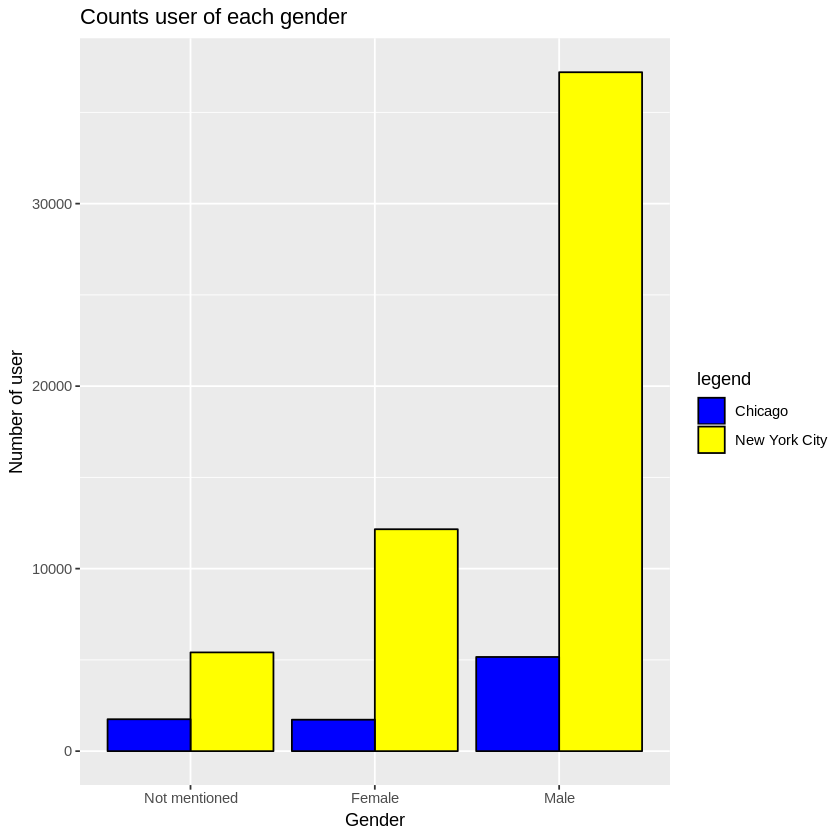

In [26]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = DataQ3) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts user of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of user', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "blue", "New York City" = "yellow"))

**Summary of your question 3.**

-Based on the analysis results of the user summary table of the two cities of Chicago and New York, we can see a huge difference between the two genders. The number of males is much larger than the number of females with the total number of males being 42,360 people, accounting for 66.81% of the total 7158 people and females being 13,882 people.

-Looking at the chart, we can also see that the number of users in Chicago is less than New York and both have more male users than female users.

-For Chicago there are 5,159 male genders and 1,723 female genders.

-For New York, there are 37,201 male genders and 12,159 female genders.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')